# Network parameters on main cores

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')

In [3]:
import matplotlib
matplotlib.use('Agg')
sns.set(rc={'text.usetex' : True})

In [4]:
matplotlib.rcParams['font.family'] = 'sans-serif'

In [5]:
from glob import glob
from os.path import join

In [6]:
import scipy.stats

In [7]:
import statsmodels.api as sm

In [26]:
%matplotlib inline

# Outline

1. Create a tidy dataframe with main core network parameters.
2. Create a grid figure with main core parameters
3. Create a Figure with cumulative intersection of main core subsets together with a null model

In [15]:
DATA = "/Users/rdora/breast_cancer/data"
FIG = '/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/'
# Tables with network parameters are scattered
# around table_{TISSUE NAME}
tissues = ['healthy',
          'luma',
          'lumb',
          'her2',
          'basal']

rename_cols = {'cutoff': 'Layer',
               'tissue': 'Tissue',
                      'deg_mean': 'Mean Deg',
                      'deg_std': 'Std Deg',
                      'ass': 'D.A',
                      'ass_attr': 'A.A',
                      'size': 'Size'}

In [16]:
df = pd.read_csv(join(DATA, "kcore_params.csv"))
df = df.rename(columns=rename_cols)

In [17]:
df = df.replace('median', '0')
df = df.replace('low', '-1')
df['Layer'] = df['Layer'].astype(int)

In [18]:
df.head()

,Layer,Tissue,Mean Deg,Std Deg,D.A,A.A,Size
0,1,healthy,14.579873,3.873612,0.006872,0.001386,12620
1,11,healthy,14.622377,3.943973,0.007415,0.001506,12343
2,12,healthy,14.628130,3.917890,0.019430,0.000825,12421
3,13,healthy,13.502851,2.987783,0.007199,0.000599,9120
4,14,healthy,14.619132,3.947425,0.014114,0.002669,12356


In [19]:
df_tidy = pd.melt(df, id_vars=["Tissue", "Layer"],
                 value_vars=["Mean Deg",
                             "Std Deg",
                             "D.A",
                             "A.A",
                             "Size"],
                 var_name="Param",
                 value_name="Value")

In [20]:
df_tidy.head()

,Tissue,Layer,Param,Value
0,healthy,1,Mean Deg,14.579873
1,healthy,11,Mean Deg,14.622377
2,healthy,12,Mean Deg,14.628130
3,healthy,13,Mean Deg,13.502851
4,healthy,14,Mean Deg,14.619132


In [21]:
df_tidy.to_csv(join(DATA, 'mcore_netparams_tidy.csv'), index=False)

## Table
Get the variance of each parameter per tissue.

In [22]:
df.groupby('Tissue').var().drop('Layer', axis=1)

,Mean Deg,Std Deg,D.A,A.A,Size
Tissue,,,,,
basal,9.368124,0.316950,0.000285,0.003650,2.966801e+06
healthy,25.530219,4.125781,0.000724,0.000005,7.762391e+06
her2,13.827763,0.089074,0.000270,0.000815,2.867327e+06
luma,51.814981,0.354088,0.000349,0.002938,3.664357e+06
lumb,22.588584,0.312144,0.000474,0.003764,2.988041e+06


In [24]:
# All but the layer with largests co-expression
df[df.Layer < 100].groupby('Tissue').var().drop('Layer', axis=1)

,Mean Deg,Std Deg,D.A,A.A,Size
Tissue,,,,,
basal,2.526281,0.250696,0.000250,0.003650,1.713548e+06
healthy,4.195674,1.816186,0.000601,0.000005,6.891678e+06
her2,0.034205,0.078469,0.000201,0.000815,1.555219e+06
luma,0.658901,0.337116,0.000315,0.002938,2.427469e+06
lumb,2.288235,0.220069,0.000386,0.003764,1.727354e+06


# Visualization

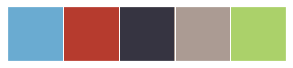

In [27]:
colors = ['#6aabd1', '#b63b2e', '#363441', '#ab9b93', '#abd16a']
pal = sns.color_palette(colors)

sns.palplot(pal)

## Grid plot with network parameters

In [43]:
df_tidy.Tissue.unique()

array(['Healthy', 'Luma', 'Lumb', 'Her2', 'Basal'], dtype=object)

In [28]:
hue_order = ["Healthy",
            "Lum A",
            "Lum B",
            "Her2",
            "Basal"]

In [40]:
df_tidy["Tissue"] = df_tidy["Tissue"].apply(lambda x: x.capitalize())

In [44]:
df_tidy = df_tidy.replace({"Luma": "Lum A",
                          "Lumb": "Lum B"})

In [45]:
df_tidy.head()

,Tissue,Layer,Param,Value
0,Healthy,1,Mean Deg,14.579873
1,Healthy,11,Mean Deg,14.622377
2,Healthy,12,Mean Deg,14.628130
3,Healthy,13,Mean Deg,13.502851
4,Healthy,14,Mean Deg,14.619132


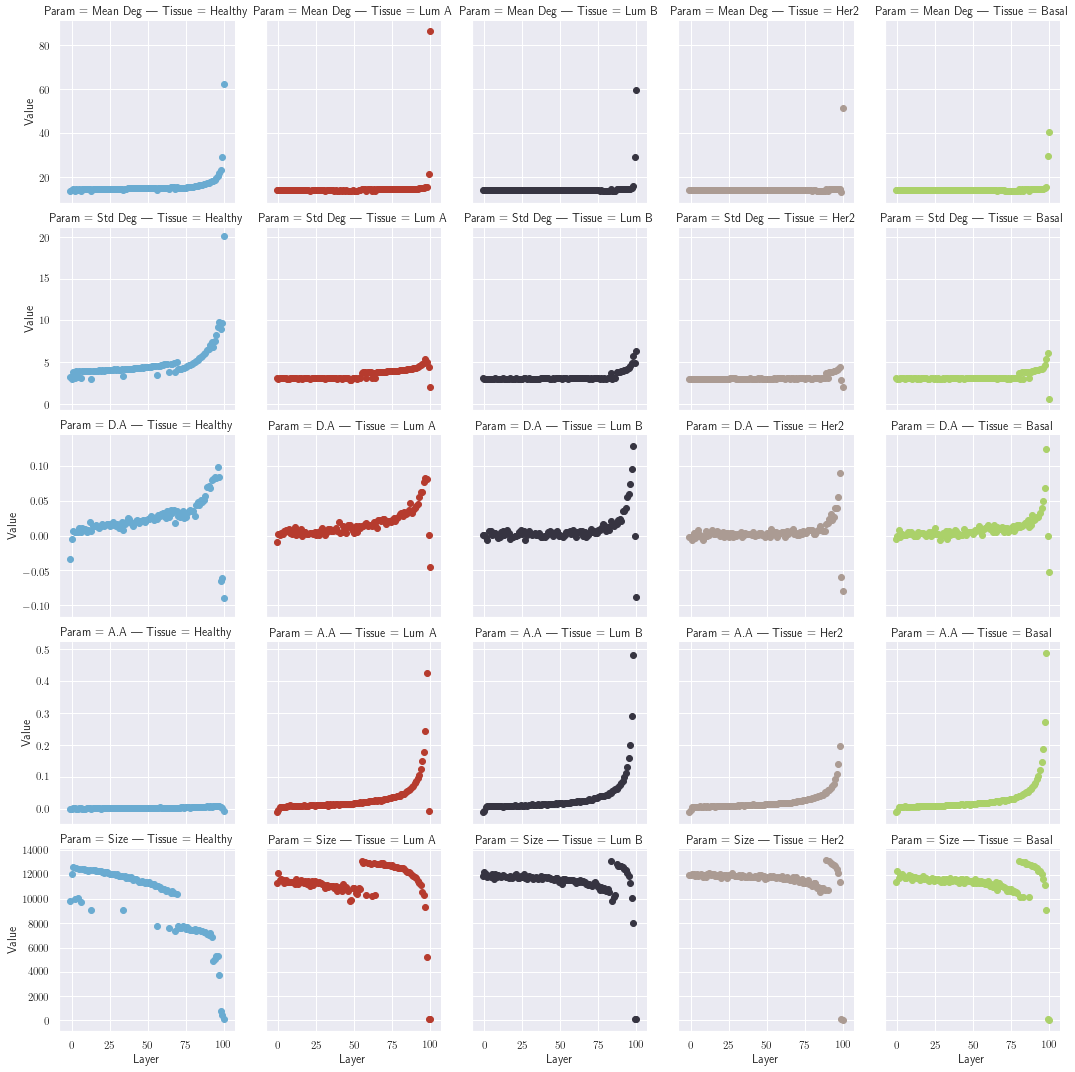

In [46]:
g = sns.FacetGrid(df_tidy, col="Tissue", row="Param", hue="Tissue",
                 hue_order=hue_order, sharex=True, sharey="row", palette=pal)
g.map(plt.scatter, "Layer", "Value")
g.savefig(join(FIG, 'main_core_facet_grid_param.png'), dpi=300)